#### Ensure gruyere files can be used

In [12]:
import sys
sys.path.append('..')
sys.path.append('../gruyere')

In [13]:
import kernex as kex
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

from gruyere.brushes import notched_square_brush, circular_brush, show_mask
from gruyere.design import _initialize_design, Design
from gruyere.generator import generate_design, _step_generator
from gruyere.states import DesignState

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 70

# We generate an initial random design 

In [3]:
## We initalize a random array
size = 50

key = jax.random.PRNGKey(42)
latent_design = jax.random.uniform(key, (size,size)) * 2 - 1

In [4]:
## We define the transform function
beta = 4
def transform(design, brush, beta=1):
    @jax.jit
    @kex.kmap(kernel_size=brush.shape, padding=('same','same'))
    def brush_conv(x):
        return jnp.sum(x * brush)

    return jnp.tanh(beta * brush_conv(design))

# Figure 2. (a)  diameter-13 circular brush

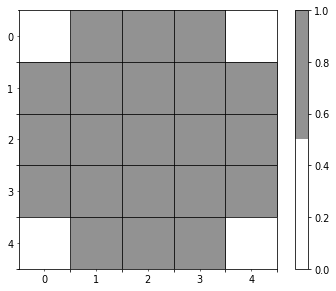

In [5]:
circ_brush = circular_brush(5)
# circ_brush = circular_brush(3)
# circ_brush = circular_brush(13)
show_mask(circ_brush);

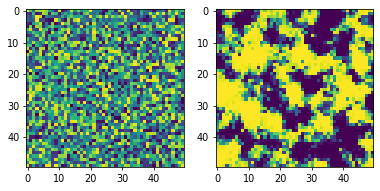

In [6]:
transformed_design1 = transform(latent_design, circ_brush)

fig, ax = plt.subplots(1,2)
ax[0].imshow(latent_design);
ax[1].imshow(transformed_design1);

In [7]:
circ_design = generate_design(transformed_design1, circ_brush)
# circ_design.show()

1 / 2500 2479
2 / 2500 2458
3 / 2500 2451
4 / 2500 2446
5 / 2500 2444
6 / 2500 2444
7 / 2500 2423
8 / 2500 2419
9 / 2500 2414
10 / 2500 2413
11 / 2500 2412
12 / 2500 2391
13 / 2500 2389
14 / 2500 2385
15 / 2500 2384
16 / 2500 2380
17 / 2500 2379
18 / 2500 2375
19 / 2500 2354
20 / 2500 2352
21 / 2500 2348
22 / 2500 2331
23 / 2500 2330
24 / 2500 2321
25 / 2500 2320
26 / 2500 2318
27 / 2500 2313
28 / 2500 2292
29 / 2500 2289
30 / 2500 2279
31 / 2500 2278
32 / 2500 2257
33 / 2500 2250
34 / 2500 2245
35 / 2500 2244
36 / 2500 2242
37 / 2500 2237
38 / 2500 2232
39 / 2500 2225
40 / 2500 2221
41 / 2500 2219
42 / 2500 2217
43 / 2500 2214
44 / 2500 2214
45 / 2500 2212
46 / 2500 2212
47 / 2500 2201
48 / 2500 2200
49 / 2500 2199
50 / 2500 2178
51 / 2500 2157
52 / 2500 2145
53 / 2500 2145
54 / 2500 2124
55 / 2500 2110
56 / 2500 2109
57 / 2500 2106
58 / 2500 2106
59 / 2500 2105
60 / 2500 2104
61 / 2500 2099
62 / 2500 2095
63 / 2500 2094
64 / 2500 2073
65 / 2500 2071
66 / 2500 2069
67 / 2500 2067
68 /

564 / 2500 100
565 / 2500 99
566 / 2500 98
567 / 2500 96
568 / 2500 95
569 / 2500 94
570 / 2500 93
571 / 2500 90
572 / 2500 90
573 / 2500 89
574 / 2500 86
575 / 2500 85
576 / 2500 79
577 / 2500 79
578 / 2500 78
579 / 2500 76
580 / 2500 65
581 / 2500 60
582 / 2500 52
583 / 2500 49
584 / 2500 48
585 / 2500 47
586 / 2500 46
587 / 2500 42
588 / 2500 40
589 / 2500 39
590 / 2500 38
591 / 2500 37
592 / 2500 36
593 / 2500 34
594 / 2500 31
595 / 2500 30
596 / 2500 23
597 / 2500 21
598 / 2500 18
599 / 2500 16
600 / 2500 14
601 / 2500 12
602 / 2500 11
603 / 2500 8
604 / 2500 7
605 / 2500 6
606 / 2500 5
607 / 2500 4
608 / 2500 3
609 / 2500 2
610 / 2500 1
611 / 2500 0
Design finished within 611steps !


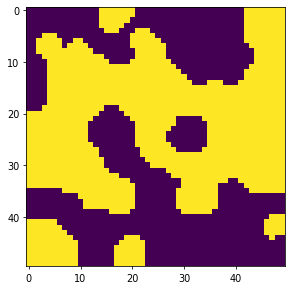

In [8]:
plt.imshow(circ_design.x)

In [9]:
from inverse_design.local_generator import generate_feasible_design_mask, dilate
from inverse_design.design import visualize

In [10]:
# brush = circ_brush

# bg_mask = jnp.logical_or(bg_epsr>2, design_region)
# eroded = dilate(jnp.logical_not(bg_mask), brush)
# dilated = dilate(bg_epsr>2, brush)


# init_t_s = jnp.logical_not(jnp.logical_or(eroded, design_region)) 
# init_t_v = jnp.logical_not(jnp.logical_or(dilated, design_region))

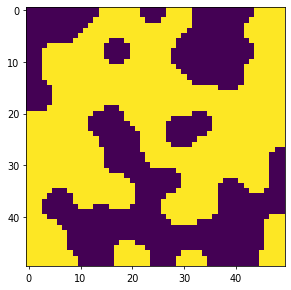

In [10]:
design = generate_feasible_design_mask(transformed_design1, circ_brush)
plt.imshow(design)

circ_design = generate_design(transformed_design1, circ_brush)
circ_design.show()

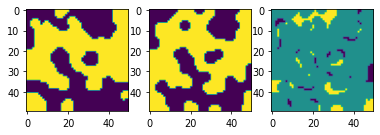

In [11]:
fig, ax = plt.subplots(1,3)
ax[0].imshow(circ_design.x)
ax[1].imshow(design)
ax[2].imshow(design - circ_design.x)